In [1]:
import torch
print(torch.__version__)

2.3.1


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
file_path = os.path.expanduser("~/code/meghagkrishnan/jet_engine/raw_data/train1_update.csv")

train_FD001 = pd.read_csv(file_path, sep=',')
train_FD001 = train_FD001.drop('id', axis=1)

columns = ['cycle', 'setting1', 'setting2', 'T24_Total_temperature_at_LPC_outlet',
           'T30_Total_temperature_at_HPC_outlet', 'T50_Total_temperature_at_LPT_outlet',
           'P30_Total_pressure_at_HPC_outlet', 'Nf_Physical_fan_speed',
           'Nc_Physical_core_speed', 'Ps30_Static_pressure_at_HPC_outlet',
           'phi_Ratio_of_fuel_flow_to_Ps30', 'NRf_Corrected_fan_speed',
           'NRc_Corrected_core_speed', 'BPR_Bypass_Ratio', 'htBleed_Bleed_Enthalpy',
           'W31_HPT_coolant_bleed', 'W32_LPT_coolant_bleed']

assert list(train_FD001.columns) == columns
print(train_FD001.head())

   cycle  setting1  setting2  T24_Total_temperature_at_LPC_outlet  \
0      1   -0.0007   -0.0004                               641.82   
1      2    0.0019   -0.0003                               642.15   
2      3   -0.0043    0.0003                               642.35   
3      4    0.0007    0.0000                               642.35   
4      5   -0.0019   -0.0002                               642.37   

   T30_Total_temperature_at_HPC_outlet  T50_Total_temperature_at_LPT_outlet  \
0                              1589.70                              1400.60   
1                              1591.82                              1403.14   
2                              1587.99                              1404.20   
3                              1582.79                              1401.87   
4                              1582.85                              1406.22   

   P30_Total_pressure_at_HPC_outlet  Nf_Physical_fan_speed  \
0                            554.36             

In [4]:
max_cycle = train_FD001['cycle'].max()
train_FD001['RUL'] = max_cycle - train_FD001['cycle']

print(train_FD001['RUL'].describe())

count    20631.000000
mean       253.192138
std         68.880990
min          0.000000
25%        206.000000
50%        258.000000
75%        310.000000
max        361.000000
Name: RUL, dtype: float64


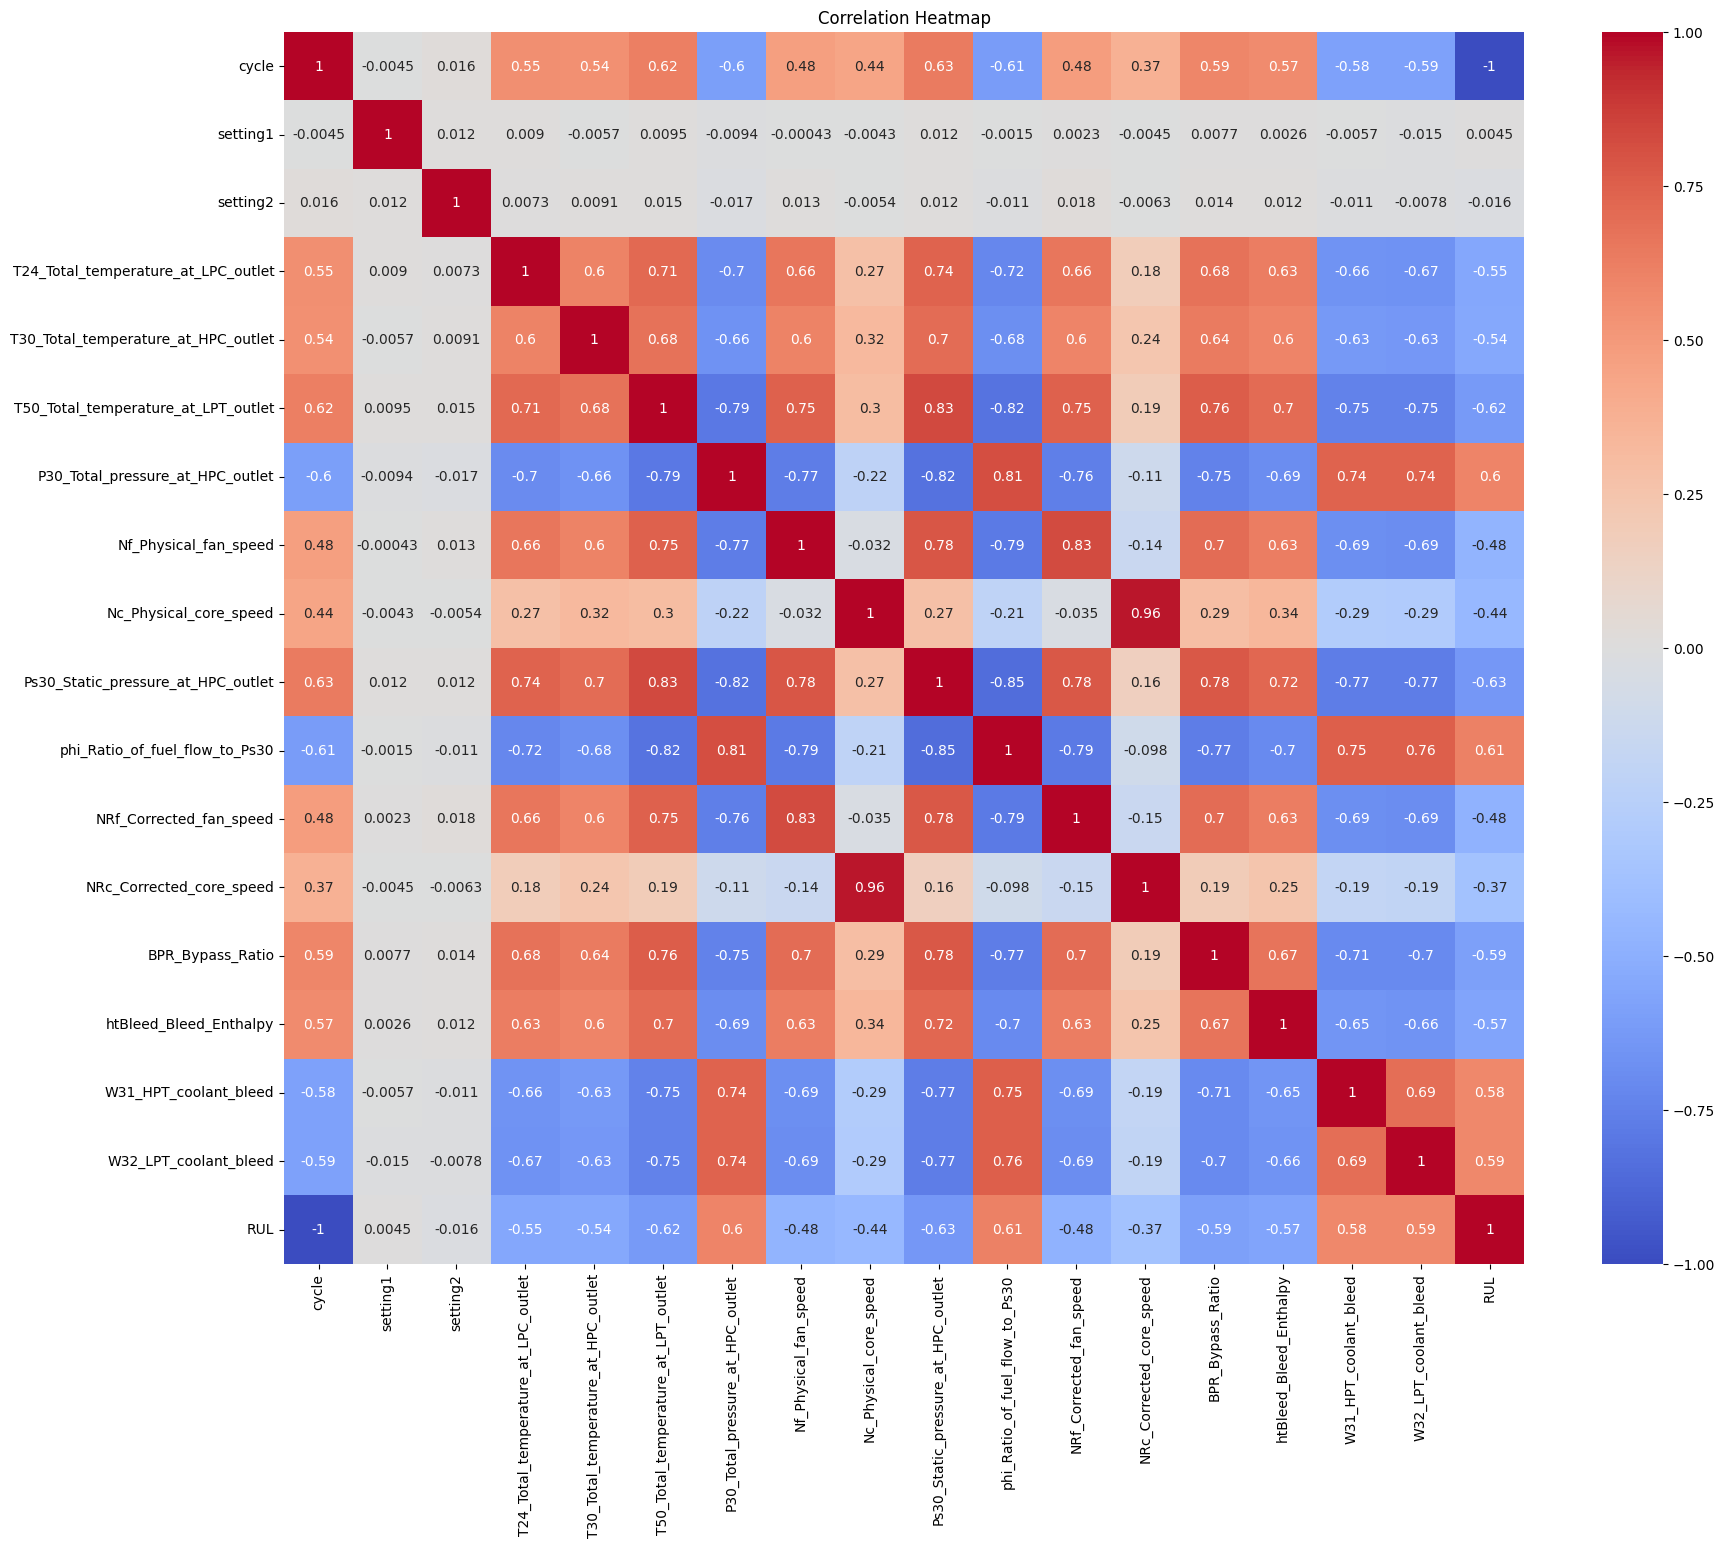

In [5]:
plt.figure(figsize=(20,16))
sns.heatmap(train_FD001.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
correlation_threshold = 0.5
selected_features = train_FD001.corr()['RUL'][abs(train_FD001.corr()['RUL']) > correlation_threshold].index.tolist()
selected_features.remove('RUL')
if 'cycle' in selected_features:
    selected_features.remove('cycle')
print("Selected features:", selected_features)

Selected features: ['T24_Total_temperature_at_LPC_outlet', 'T30_Total_temperature_at_HPC_outlet', 'T50_Total_temperature_at_LPT_outlet', 'P30_Total_pressure_at_HPC_outlet', 'Ps30_Static_pressure_at_HPC_outlet', 'phi_Ratio_of_fuel_flow_to_Ps30', 'BPR_Bypass_Ratio', 'htBleed_Bleed_Enthalpy', 'W31_HPT_coolant_bleed', 'W32_LPT_coolant_bleed']


In [7]:
scaler = StandardScaler()
train_FD001_scaled = train_FD001.copy()
train_FD001_scaled[selected_features] = scaler.fit_transform(train_FD001[selected_features])

In [8]:
train_FD001_cleaned = train_FD001_scaled.dropna()

print(train_FD001_cleaned.head())
print(train_FD001_cleaned.columns)

   cycle  setting1  setting2  T24_Total_temperature_at_LPC_outlet  \
0      1   -0.0007   -0.0004                            -1.721725   
1      2    0.0019   -0.0003                            -1.061780   
2      3   -0.0043    0.0003                            -0.661813   
3      4    0.0007    0.0000                            -0.661813   
4      5   -0.0019   -0.0002                            -0.621816   

   T30_Total_temperature_at_HPC_outlet  T50_Total_temperature_at_LPT_outlet  \
0                            -0.134255                            -0.925936   
1                             0.211528                            -0.643726   
2                            -0.413166                            -0.525953   
3                            -1.261314                            -0.784831   
4                            -1.251528                            -0.301518   

   P30_Total_pressure_at_HPC_outlet  Nf_Physical_fan_speed  \
0                          1.121141             

In [9]:
test_file_path = os.path.expanduser("~/code/meghagkrishnan/jet_engine/raw_data/test_FD001_processed.csv")
test_FD001 = pd.read_csv(test_file_path)

In [10]:
print("Initial test data columns:", test_FD001.columns)
print("Initial test data shape:", test_FD001.shape)

Initial test data columns: Index(['id', 'cycle', 'setting1', 'setting2',
       'T24_Total_temperature_at_LPC_outlet',
       'T30_Total_temperature_at_HPC_outlet',
       'T50_Total_temperature_at_LPT_outlet',
       'P30_Total_pressure_at_HPC_outlet', 'Nf_Physical_fan_speed',
       'Nc_Physical_core_speed', 'Ps30_Static_pressure_at_HPC_outlet',
       'phi_Ratio_of_fuel_flow_to_Ps30', 'NRf_Corrected_fan_speed',
       'NRc_Corrected_core_speed', 'BPR_Bypass_Ratio',
       'htBleed_Bleed_Enthalpy', 'W31_HPT_coolant_bleed',
       'W32_LPT_coolant_bleed'],
      dtype='object')
Initial test data shape: (13096, 18)


In [11]:
test_FD001_scaled = test_FD001.copy()
test_FD001_scaled[selected_features] = scaler.transform(test_FD001[selected_features])

In [12]:
test_FD001_cleaned = test_FD001_scaled.dropna()

print("\nFinal test data shape:", test_FD001_cleaned.shape)
print("Final test data columns:", test_FD001_cleaned.columns)


Final test data shape: (13096, 18)
Final test data columns: Index(['id', 'cycle', 'setting1', 'setting2',
       'T24_Total_temperature_at_LPC_outlet',
       'T30_Total_temperature_at_HPC_outlet',
       'T50_Total_temperature_at_LPT_outlet',
       'P30_Total_pressure_at_HPC_outlet', 'Nf_Physical_fan_speed',
       'Nc_Physical_core_speed', 'Ps30_Static_pressure_at_HPC_outlet',
       'phi_Ratio_of_fuel_flow_to_Ps30', 'NRf_Corrected_fan_speed',
       'NRc_Corrected_core_speed', 'BPR_Bypass_Ratio',
       'htBleed_Bleed_Enthalpy', 'W31_HPT_coolant_bleed',
       'W32_LPT_coolant_bleed'],
      dtype='object')


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X_train = train_FD001_cleaned.drop(['RUL', 'cycle'], axis=1)
y_train = train_FD001_cleaned['RUL']

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
numeric_features = X_train.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [16]:
pipeline.fit(X_train, y_train)
y_val_pred = pipeline.predict(X_val)

val_r2 = r2_score(y_val, y_val_pred)
print("Validation R2 Score:", val_r2)

Validation R2 Score: 0.5221700911308476


In [17]:
X_test = test_FD001_cleaned.drop(['cycle'], axis=1)

# using text data predict
y_test_pred = pipeline.predict(X_test)


results_df = pd.DataFrame({
    'id': test_FD001_cleaned.index,
    'predicted_RUL': y_test_pred
})

final_predictions = results_df.groupby('id').last().reset_index()

print("\nFinal predictions:")
print(final_predictions.head())


Final predictions:
   id  predicted_RUL
0   0     301.676999
1   1     306.869408
2   2     292.909163
3   3     299.924620
4   4     313.485769


Model Random Forest Regressor

In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
columns_to_drop = ['RUL', 'cycle']
if 'id' in train_FD001_cleaned.columns:
    columns_to_drop.append('id')
X_train = train_FD001_cleaned.drop(columns_to_drop, axis=1)
y_train = train_FD001_cleaned['RUL']

columns_to_drop = ['cycle']
if 'id' in test_FD001_cleaned.columns:
    columns_to_drop.append('id')
X_test = test_FD001_cleaned.drop(columns_to_drop, axis=1)

X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

param_dist = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

In [32]:
random_search = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist, 
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error', 
                                   n_jobs=-1, random_state=42)
random_search.fit(X_sample, y_sample)

print("Best parameters:", random_search.best_params_)

Best parameters: {'rf__n_estimators': 200, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 2, 'rf__max_depth': 10}


In [33]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)

if 'id' in test_FD001_cleaned.columns:
    results_df = pd.DataFrame({
        'id': test_FD001_cleaned['id'],
        'predicted_RUL': y_pred
    })
else:
    results_df = pd.DataFrame({
        'predicted_RUL': y_pred
    })

if 'id' in results_df.columns:
    final_predictions = results_df.groupby('id').last().reset_index()
else:
    final_predictions = results_df

print("\nFinal predictions:")
print(final_predictions.head())


Final predictions:
   id  predicted_RUL
0   1     298.900359
1   2     312.172999
2   3     231.386189
3   4     274.616819
4   5     272.295590


In [34]:
final_predictions.to_csv('random_forest_predictions.csv', index=False)

In [37]:
cv_mse_scores = -cross_val_score(best_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=3, scoring='r2')

print("Cross-validation MSE scores:", cv_mse_scores)
print("Average CV MSE:", cv_mse_scores.mean())
print("CV MSE Standard Deviation:", cv_mse_scores.std())

print("\nCross-validation R² scores:", cv_r2_scores)
print("Average CV R²:", cv_r2_scores.mean())
print("CV R² Standard Deviation:", cv_r2_scores.std())

Cross-validation MSE scores: [1554.42412169 1663.35583876 2994.64239978]
Average CV MSE: 2070.80745341164
CV MSE Standard Deviation: 654.7619342682721

Cross-validation R² scores: [0.61445777 0.60524318 0.48782041]
Average CV R²: 0.5691737857729122
CV R² Standard Deviation: 0.05764839407544413


LSTM

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [53]:
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols = ['setting1', 'setting2', 'cycle']
sequence_cols.extend(sensor_cols)